In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

<h3>
    <u>Incorporation of regularization term for more complex logistic regression</u>
</h3>

###### The cost function and derivative are almost the same, expect for the variable 'reg'
###### Regularization terms are used to correct overfitting and underfitting within regression

In [2]:
# sigmoid function for mapping values to bernoulli values
def sigmoid(pred_val):
    return 1 / (1 + np.exp(-pred_val))

In [3]:
# combined cost function for logistic regression with regularization term
def cost(pred_val, actual_val, theta_vals, m, reg):
    return (1 / m) * np.sum(-1*actual_val.T @ np.log(pred_val) - (1 - actual_val).T @ np.log(1.00001 - pred_val)) + (reg / (2 * m)) * np.sum(np.square(theta_vals))

In [4]:
# cost derivative for logistic regression with regularization term (same as linear regression)
def cost_derivative(pred_val, actual_val, input_val, theta_vals, m, reg):
    return (1 / m) * input_val.T @ (pred_val - actual_val) + (reg / m) * theta_vals

In [5]:
# plotting variables
plot_log_x = np.random.random(800) * 5
plot_log_y = np.random.random(800) * 5
plot_classification = (-0.75*(plot_log_x * plot_log_x) + 2.9*(plot_log_x) + 0.5 < plot_log_y)

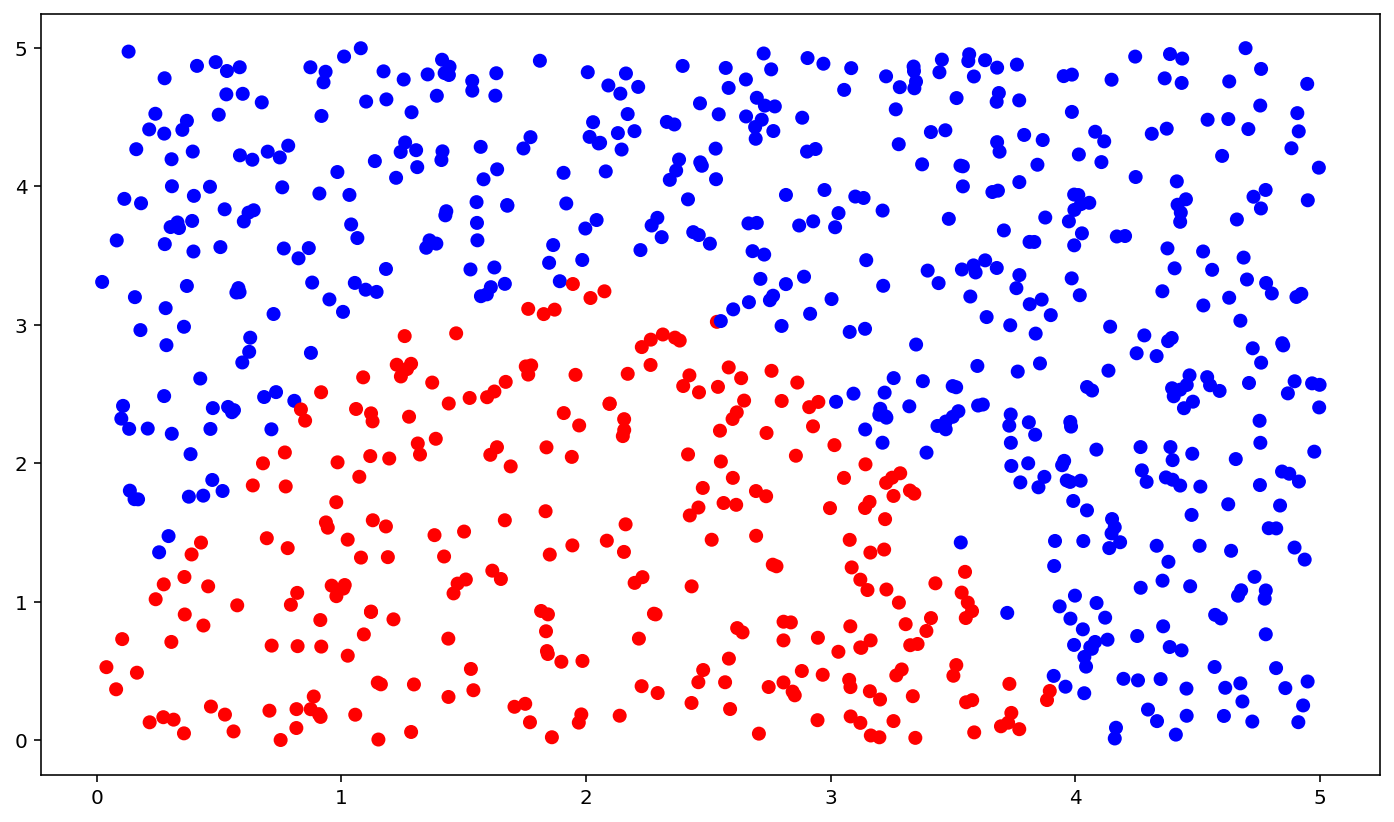

In [6]:
plt.scatter(plot_log_x, plot_log_y, c = plot_classification, cmap="bwr_r")

###### Here we set our learning rate to 0.1 and lambda_value (regularization term) to 0.8, but some experimentation is needed to choose the appropriate values

In [7]:
# initializing constants
learning_rate = 0.1
num_iterations = 1000
lambda_val = 0.8
m = plot_log_x.size

In [8]:
# initializing gradient descent variables
logistic_input = np.matrix([np.ones(m), plot_log_x, plot_log_x * plot_log_x, plot_log_y]).T
logistic_output = np.matrix(plot_classification).T
thetas = np.matrix(np.random.random(4) * 4 - 4).T

In [9]:
# gradient descent
costs = []

for iteration in range(num_iterations):
    pred_val = sigmoid(logistic_input @ thetas)
    temp_thetas = thetas
    temp_thetas[0] = 0
    thetas = thetas - learning_rate * cost_derivative(pred_val, 1 * logistic_output, logistic_input, temp_thetas, m, lambda_val)
    costs.append(cost(pred_val, logistic_output, temp_thetas, m, lambda_val))

###### A common technique used in machine learning is to analyze the cost function to see if the constants are set appropriately
###### Generally, as long as your cost function is decreasing for every iteration, the constants are fine

Text(0.5, 1.0, 'Cost function with respect to time')

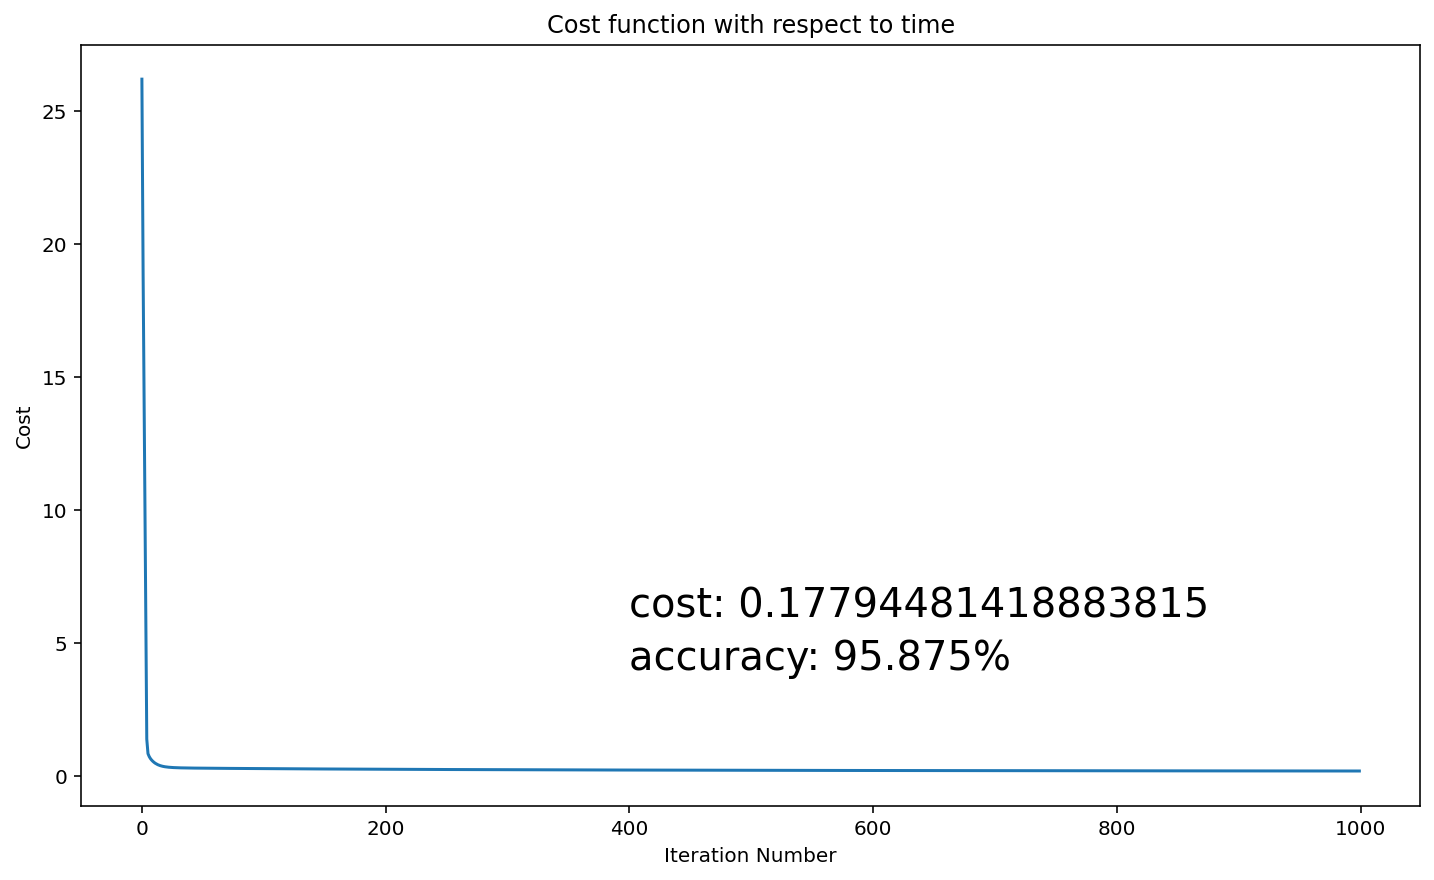

In [10]:
# visualization of cost function
plt.plot(costs)

cost_text = 'cost: ' + str(cost(pred_val, logistic_output, temp_thetas, m, lambda_val))
percent_text = 'accuracy: ' + str((np.sum((pred_val > 0.5) == logistic_output) / pred_val.size) * 100) + '%'

plt.text(400, 6, cost_text, fontsize=20)
plt.text(400, 4, percent_text, fontsize=20)

plt.xlabel('Iteration Number')
plt.ylabel('Cost')

plt.title('Cost function with respect to time')

###### Again, there will be error with this model due to the regularization term, small sample size, and inherit error

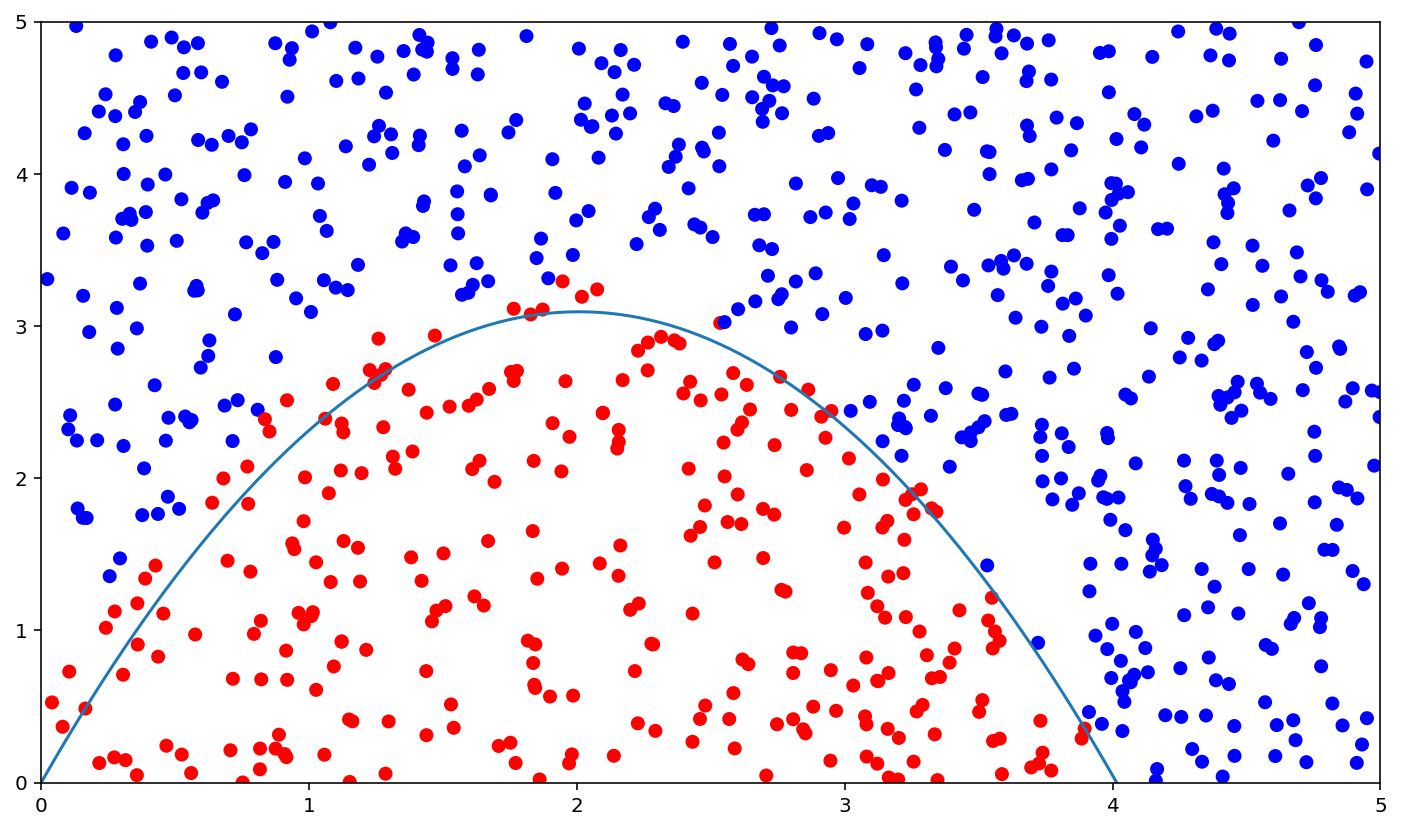

In [11]:
x = np.linspace(0, 5, 400)
y = -(thetas.item(0, 0) + x * thetas.item(1, 0) + x**2 * thetas.item(2, 0)) / thetas.item(3, 0)

plt.xlim(0, 5)
plt.ylim(0, 5)

plt.plot(x, y)
plt.scatter(plot_log_x, plot_log_y, c = plot_classification, cmap="bwr_r")

<h3>
    <u>One vs All Logistic Regression</u>
</h3>

###### Sometimes we need to classify groups into more than two categories, so we want to generate two boundaries in this case between the 3 colors

In [12]:
colors = np.array(['red', 'purple', 'orange'])

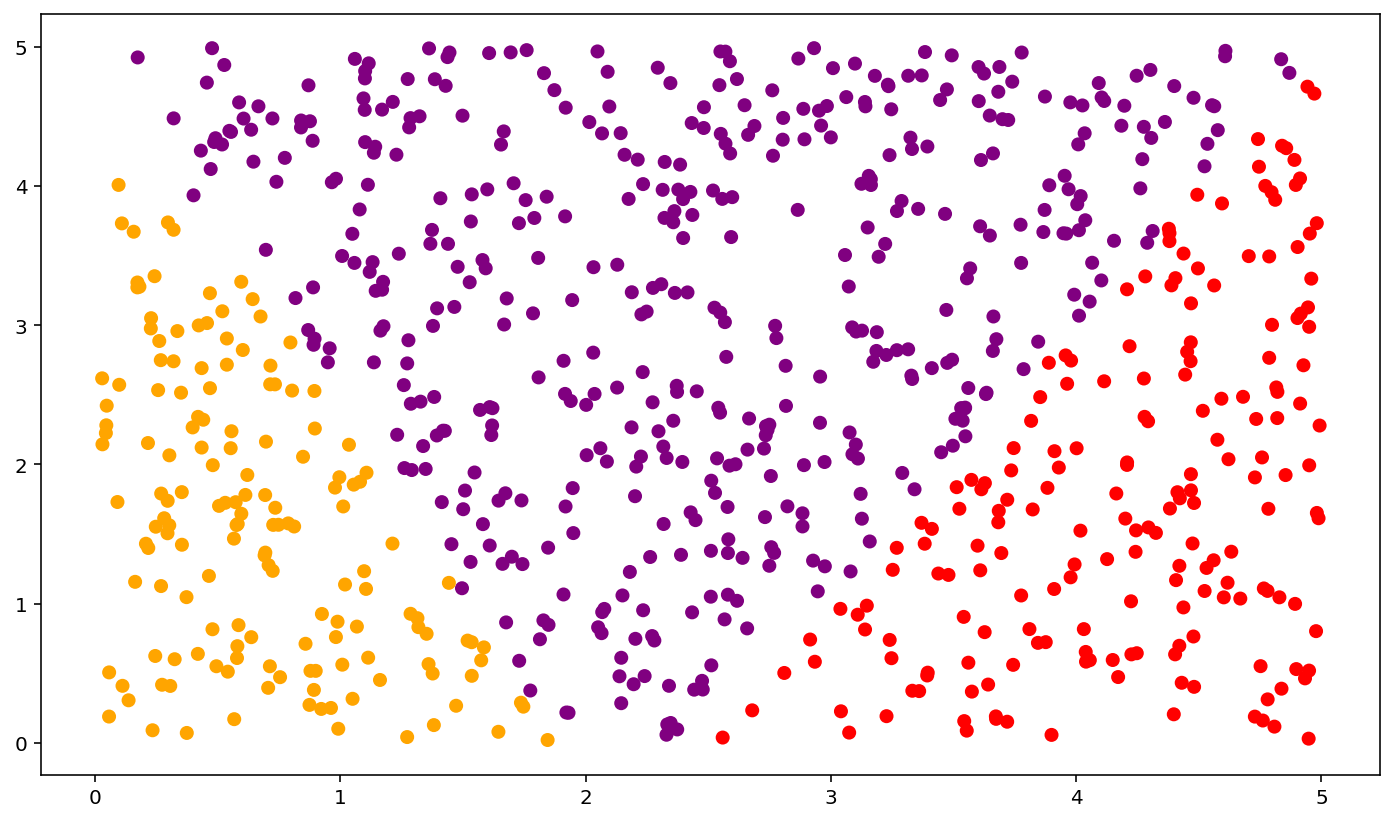

In [13]:
plot_one_v_all_x = np.random.random(800) * 5
plot_one_v_all_y = np.random.random(800) * 5
plot_one_v_all_class = 1 * (plot_one_v_all_y < (-8 / 3) * plot_one_v_all_x + 5) + 1 * (plot_one_v_all_y > 2 * plot_one_v_all_x - 5)

plt.scatter(plot_one_v_all_x, plot_one_v_all_y, color = colors[plot_one_v_all_class])

In [14]:
# initializing constants
learning_rate = 0.5
num_iterations = 10000
num_classifications = 3
lambda_val = 0
m = plot_one_v_all_x.size

labels = ['boundary between purple and red', '', 'boundary between purple and orange']

In [15]:
# initializing variables
one_v_all_input = np.matrix([np.ones(plot_one_v_all_x.size), plot_one_v_all_x, plot_one_v_all_y]).T
one_v_all_output = np.matrix(plot_one_v_all_class).T
plot_thetas = []
pred_vals = []

###### The gradient descent algorithm is essentially the same
###### However, we can't assign values such as [0, 1, 2] for our three values
###### Instead, we iterate through each booundary, setting it to 1 and the rest to 0, hence the name "One vs All"
###### For example, in this case our outputs would be [1, 0, 0], [0, 1, 0], and [0, 0, 1]

In [16]:
# goes through each classification
for one_v_all_val in range(num_classifications):
    # resets the thetas and sets the new current outputs
    one_v_all_thetas = np.matrix(np.random.random(3) - 0.5).T
    current_output = 1 * (one_v_all_output == one_v_all_val)
    # gradient descent for each value
    for iteration in range(num_iterations):
        pred_val = sigmoid(one_v_all_input @ one_v_all_thetas)
        one_v_all_thetas = one_v_all_thetas - learning_rate * cost_derivative(pred_val, current_output, one_v_all_input, one_v_all_thetas, m, lambda_val)
    # appends the theta and predicted values to their lists
    plot_thetas.append(one_v_all_thetas)
    pred_vals.append(pred_val)

###### We ignore the 2nd element because it doesn't fit our graph
###### There were three boundary lines generated but we only need two (it's impossible to have one line be a boundary between purple and the rest)

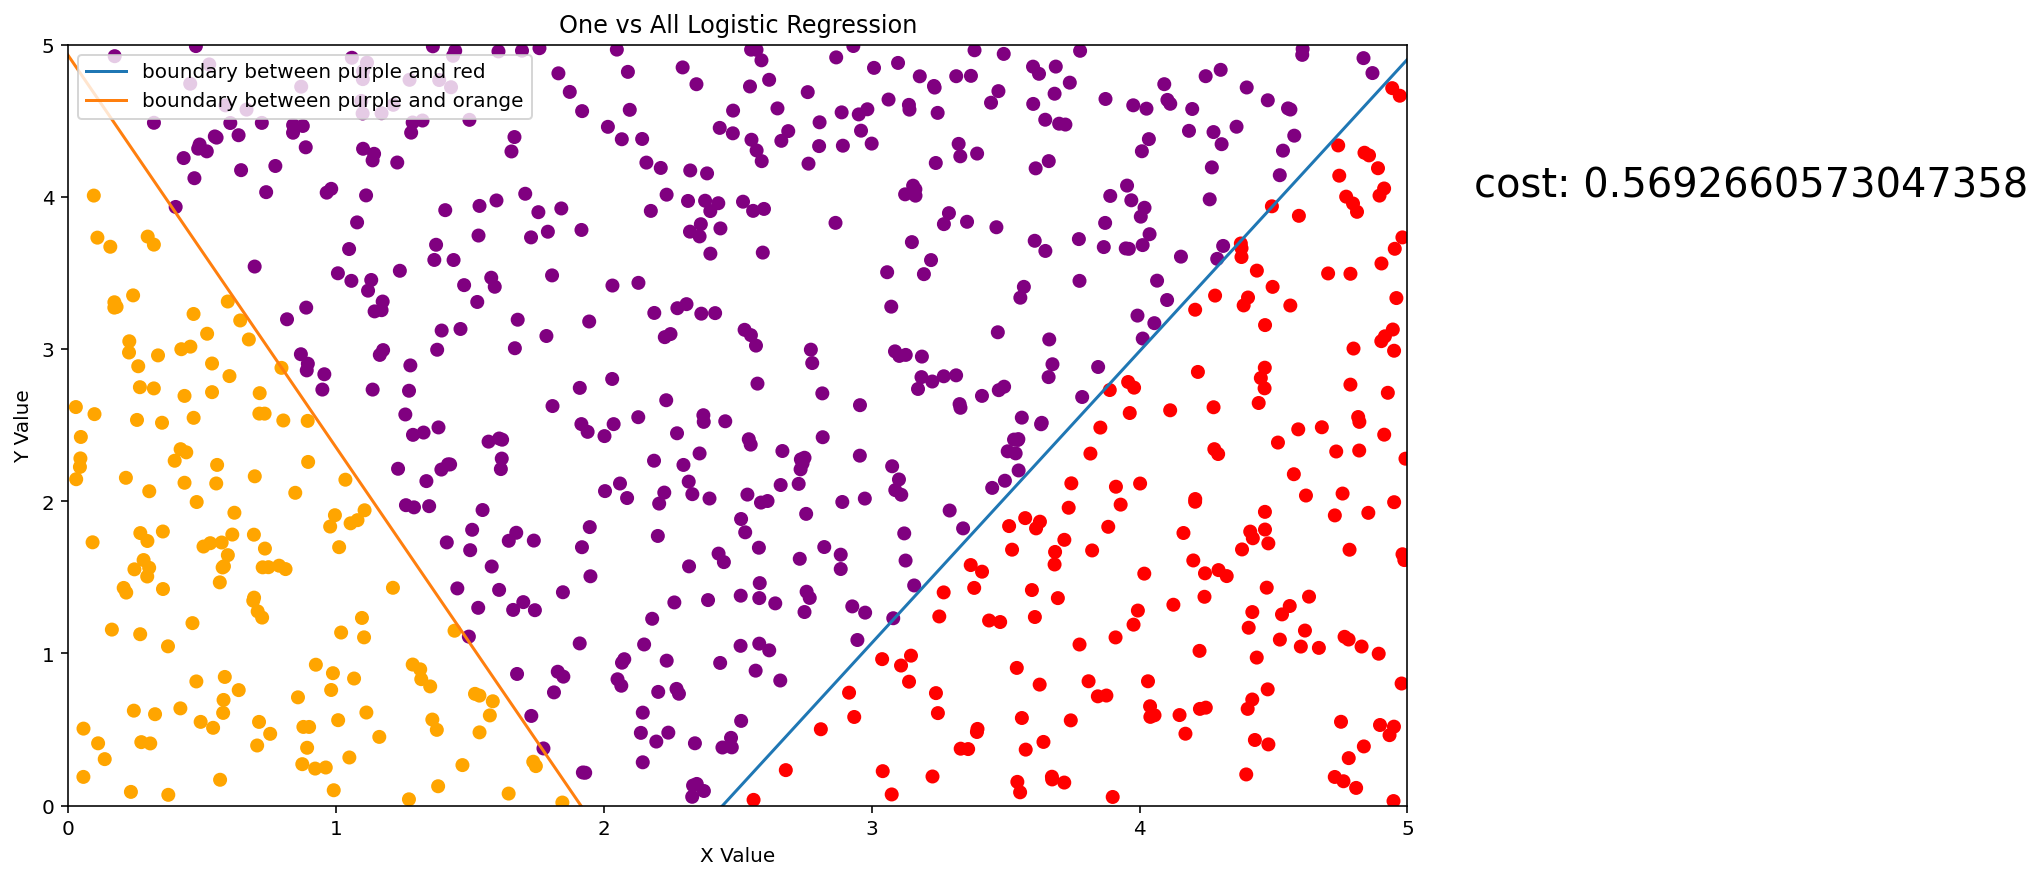

In [17]:
# original plot
plt.scatter(plot_one_v_all_x, plot_one_v_all_y, color = colors[plot_one_v_all_class])

# plots each line
for classification_val in range(num_classifications):
    # we can ignore the value for 1 (not graphable)
    if (classification_val == 1):
        continue
    # gets each y value needed
    y1 = -(plot_thetas[classification_val].item(0, 0) + -10 * plot_thetas[classification_val].item(1, 0)) / plot_thetas[classification_val].item(2, 0)
    y2 = -(plot_thetas[classification_val].item(0, 0) + 10 * plot_thetas[classification_val].item(1, 0)) / plot_thetas[classification_val].item(2, 0)
    # plots the values
    plt.plot([-10, 10], [y1, y2], label = labels[classification_val])

plt.xlim(0, 5)
plt.ylim(0, 5)

plt.xlabel('X Value')
plt.ylabel('Y Value')

plt.title('One vs All Logistic Regression')

cost_text = 'cost: ' + str(cost(pred_vals[0], 1 * (one_v_all_output == 0), plot_thetas[0], m, lambda_val) +
                           cost(pred_vals[1], 1 * (one_v_all_output == 1), plot_thetas[1], m, lambda_val))
plt.text(5.25, 4, cost_text, fontsize=20)

plt.legend()
plt.show()

<u></u>